Import Libraries 

In [338]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore")

# Text processing and visualization
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from tabulate import tabulate

# Preprocessing and model selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Save model
import pickle

Load and Explore the Dataset

In [339]:
# Load dataset
Car = pd.read_csv('dataset.csv')

In [340]:
# Preview the data
Car.head()


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [341]:
# Dataset shape
print("Dataset Shape:", Car.shape)


Dataset Shape: (6019, 14)


In [342]:
# Info about columns
Car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [343]:
# Summary statistics
Car.describe(include="all")

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6019.000000,6019,6019,6019.000000,6.019000e+03,6019,6019,6019,6017,5983,5983,5977.000000,824,6019.000000
unique,NaN,1876,11,NaN,NaN,5,2,4,442,146,372,NaN,540,NaN
top,NaN,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,NaN,49,790,NaN,NaN,3205,4299,4929,172,606,235,NaN,6,NaN
mean,3009.000000,NaN,NaN,2013.358199,5.873838e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.278735,NaN,9.479468
std,1737.679967,NaN,NaN,3.269742,9.126884e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.808840,NaN,11.187917
min,0.000000,NaN,NaN,1998.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,1504.500000,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,3009.000000,NaN,NaN,2014.000000,5.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,4513.500000,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [344]:
# Check for missing values
print("\nMissing values:\n", Car.isnull().sum())



Missing values:
 Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


Data Cleaning

In [345]:
# Drop unnecessary columns
Car.drop(['Unnamed: 0', 'New_Price'], axis=1, inplace=True)

In [346]:
# Clean 'Mileage' column
Car['Mileage'] = Car['Mileage'].astype(str).str.extract(r'(\d+\.\d+|\d+)')
Car['Mileage'] = pd.to_numeric(Car['Mileage'], errors='coerce')
Car['Mileage'] = Car['Mileage'].fillna(Car['Mileage'].median())

In [347]:
# Clean 'Engine' column
Car['Engine'] = Car['Engine'].astype(str).str.extract(r'(\d+)')
Car['Engine'] = pd.to_numeric(Car['Engine'], errors='coerce')
Car['Engine'] = Car['Engine'].fillna(Car['Engine'].median())


In [348]:
# Clean 'Power' column
Car['Power'] = Car['Power'].astype(str)
Car['Power'] = Car['Power'].replace('null', np.nan)
Car['Power'] = Car['Power'].str.extract(r'(\d+\.\d+|\d+)')
Car['Power'] = pd.to_numeric(Car['Power'], errors='coerce')

In [349]:
# Fill missing 'Seats' with mode
Car['Seats'] = Car['Seats'].fillna(Car['Seats'].mode()[0])

In [350]:
# Check final missing values
print("\nMissing values after cleaning:\n", Car.isnull().sum())


Missing values after cleaning:
 Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                143
Seats                  0
Price                  0
dtype: int64


In [351]:
# Fill missing 'Power' values using the median within each car name group
Car['Power'] = Car.groupby('Name')['Power'].transform(lambda x: x.fillna(x.median()))

#  For any remaining missing 'Power' values (e.g., if a car name had all missing), fill with overall median
Car['Power'] = Car['Power'].fillna(Car['Power'].median())

In [352]:
# Check final missing values
print("\nMissing values after cleaning:\n", Car.isnull().sum())


Missing values after cleaning:
 Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


Price Column Check and Conversion

In [353]:
# Check price values
print("Price column check:")
print(Car['Price'].head(10))
print("Price Summary:")
print(Car['Price'].describe())

Price column check:
0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
5     2.35
6     3.50
7    17.50
8     5.20
9     1.95
Name: Price, dtype: float64
Price Summary:
count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64


In [354]:
# Convert price to consistent unit
price_mean = Car['Price'].mean()
if price_mean < 100:
    print("Price appears to be in Lakhs")
    Car['Price_in_Rupees'] = Car['Price'] * 100000
else:
    print("Price appears to be in Rupees")
    Car['Price_in_Lakhs'] = Car['Price'] / 100000

Price appears to be in Lakhs


 Exploratory Data Analysis (EDA)

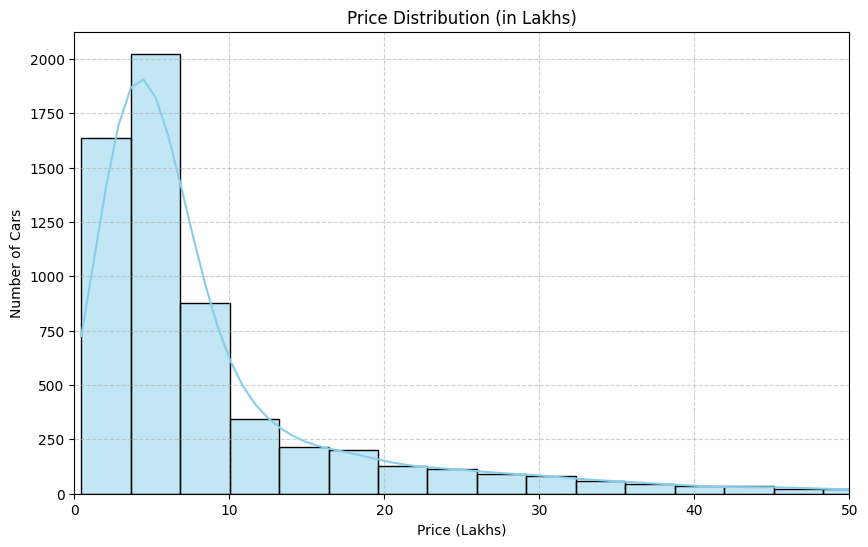

In [355]:
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Price_in_Rupees']/100000, bins=50, kde=True, color='skyblue')
plt.title('Price Distribution (in Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Number of Cars')
plt.xlim(0, 50)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

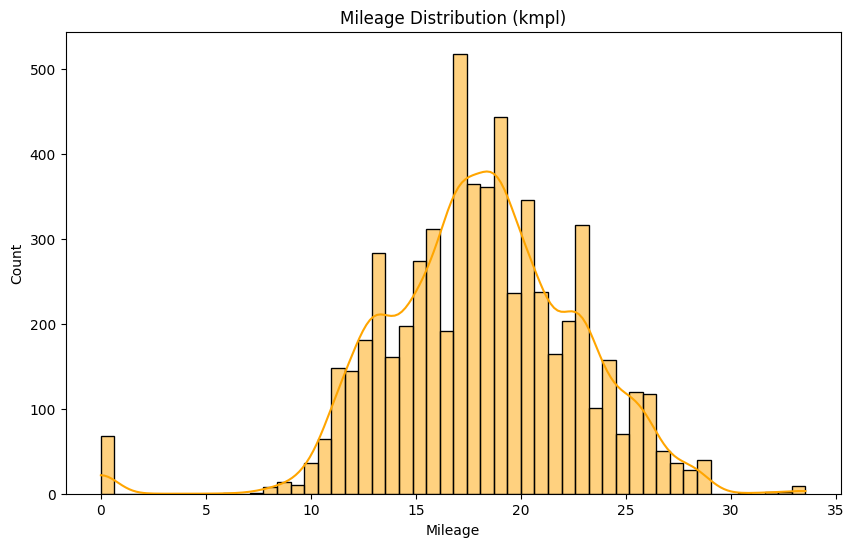

In [356]:
# Mileage Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Mileage'], kde=True, color='orange')
plt.title('Mileage Distribution (kmpl)')
plt.xlabel('Mileage')
plt.ylabel('Count')
plt.show()

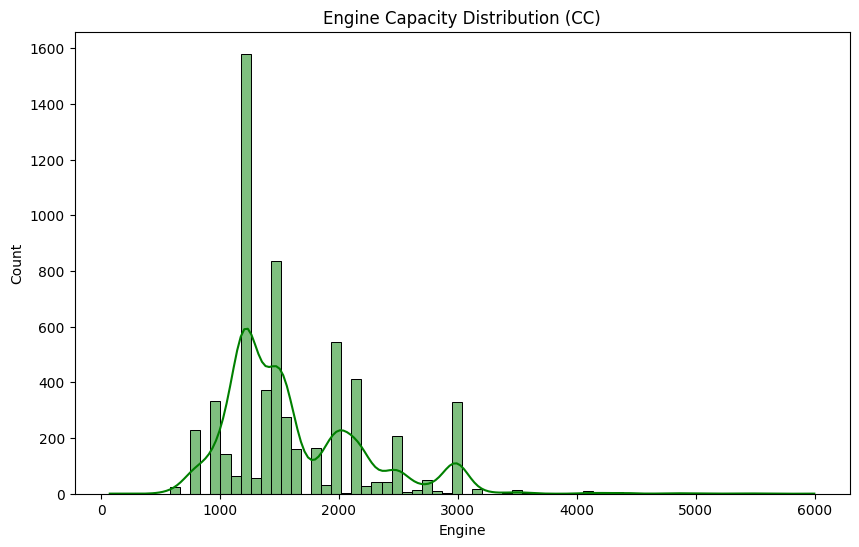

In [357]:
# Engine Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Engine'], kde=True, color='green')
plt.title('Engine Capacity Distribution (CC)')
plt.xlabel('Engine')
plt.ylabel('Count')
plt.show()


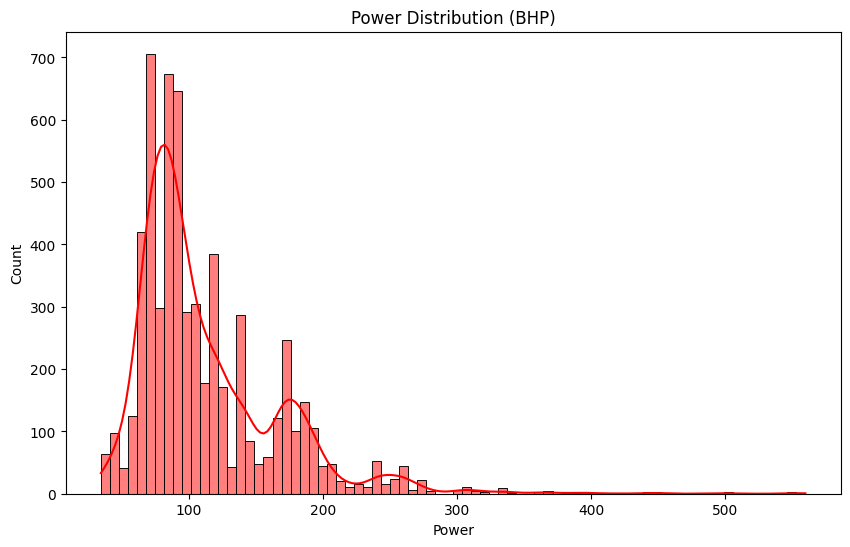

In [358]:
# Power Distribution
plt.figure(figsize=(10,6))
sns.histplot(Car['Power'], kde=True, color='red')
plt.title('Power Distribution (BHP)')
plt.xlabel('Power')
plt.ylabel('Count')
plt.show()

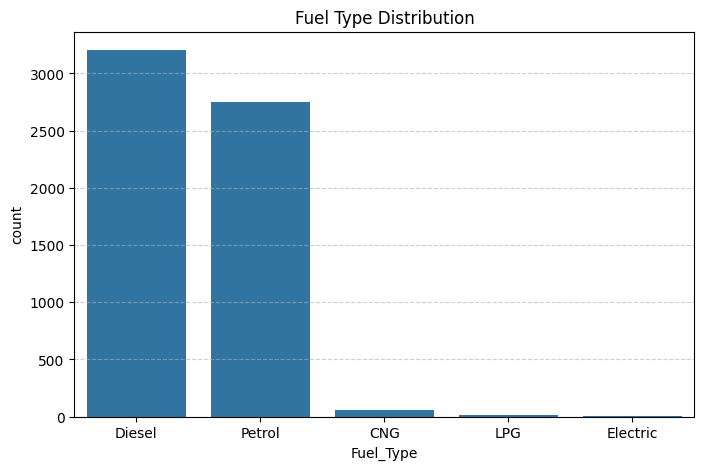

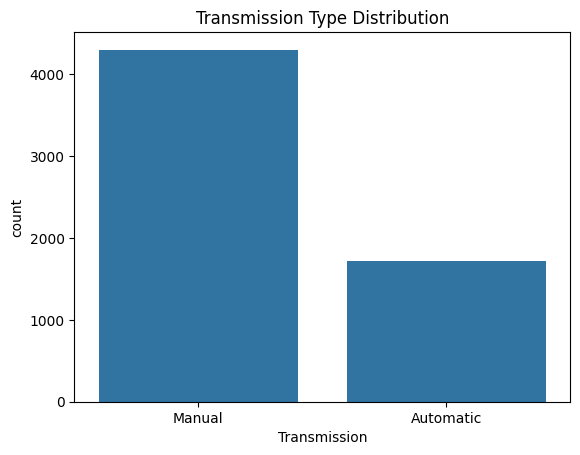

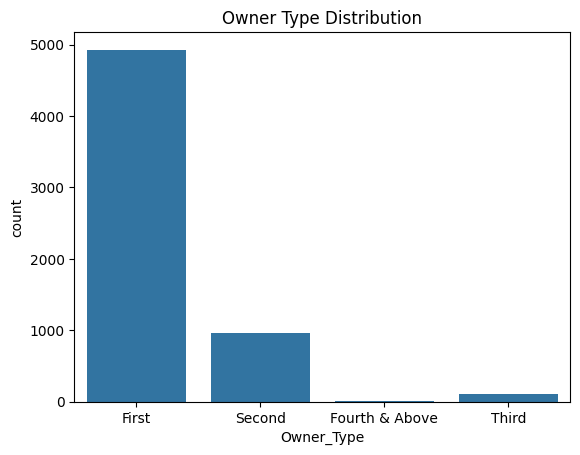

In [359]:
# Categorical Distributions 
plt.figure(figsize=(8,5))
sns.countplot(x='Fuel_Type', data=Car, order=Car['Fuel_Type'].value_counts().index)
plt.title('Fuel Type Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

plt.figure()
sns.countplot(x='Transmission', data=Car)
plt.title('Transmission Type Distribution')
plt.show()

plt.figure()
sns.countplot(x='Owner_Type', data=Car)
plt.title('Owner Type Distribution')
plt.show()

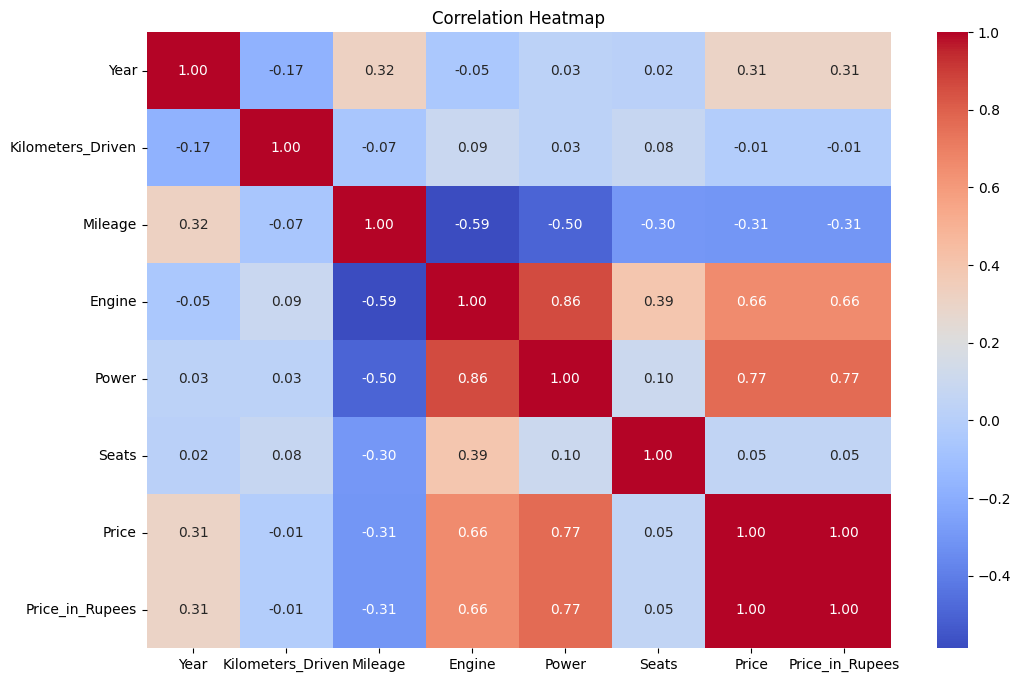

In [360]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(Car.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

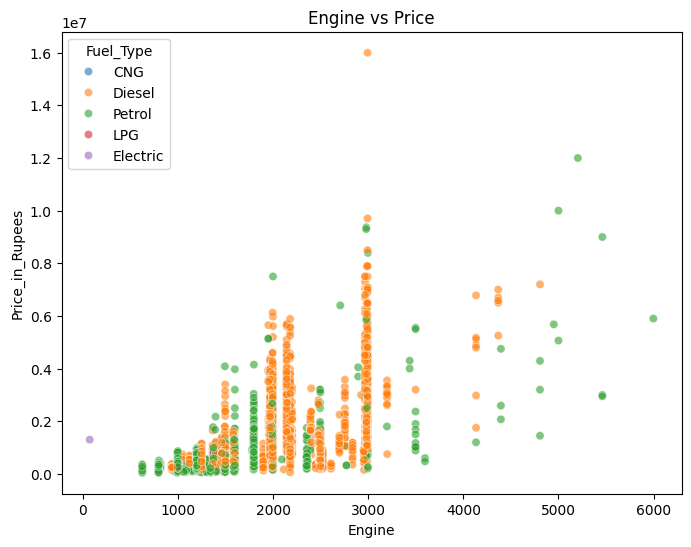

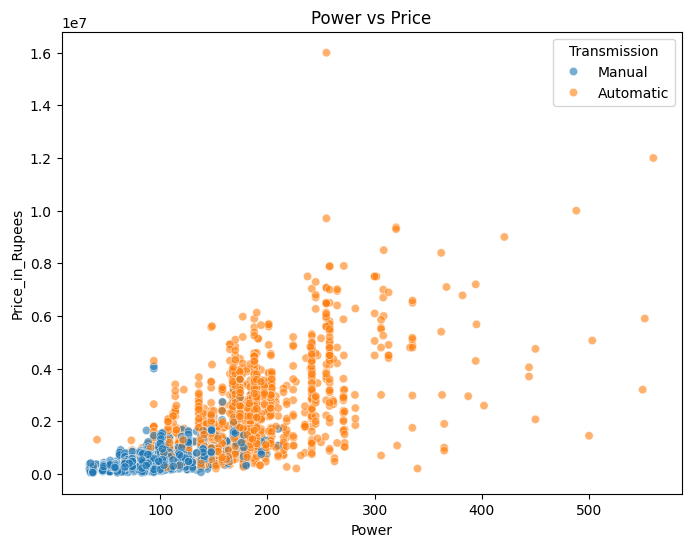

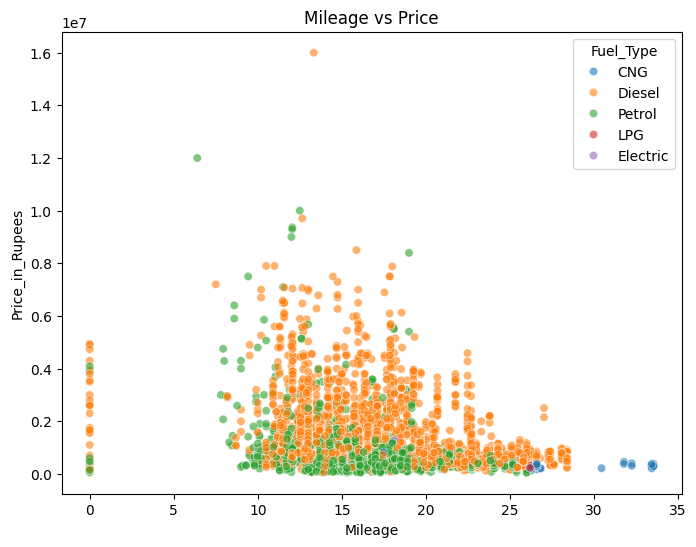

In [361]:
# Scatter Plots
plt.figure(figsize=(8,6))
sns.scatterplot(x='Engine', y='Price_in_Rupees', hue='Fuel_Type', data=Car, alpha=0.6)
plt.title('Engine vs Price')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Power', y='Price_in_Rupees', hue='Transmission', data=Car, alpha=0.6)
plt.title('Power vs Price')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage', y='Price_in_Rupees', hue='Fuel_Type', data=Car, alpha=0.6)
plt.title('Mileage vs Price')
plt.show()

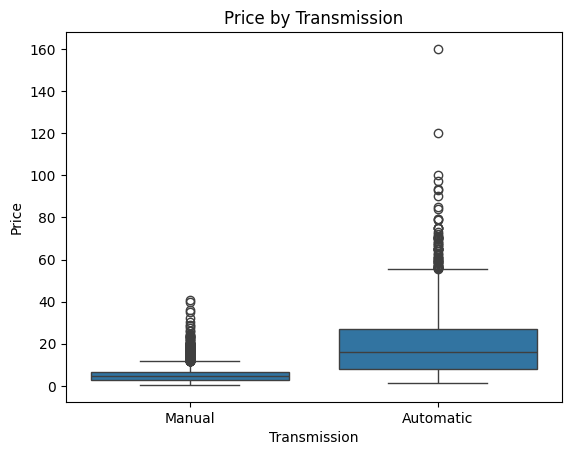

In [362]:
# Box Plot
sns.boxplot(x='Transmission', y='Price', data=Car)
plt.title('Price by Transmission')
plt.show()

Electric Vehicle Feature Adjustment

In [363]:
electric_mask = Car['Fuel_Type'].str.lower() == 'electric'
Car.loc[electric_mask, ['Mileage', 'Engine', 'Power', 'Kilometers_Driven']] = 0

Feature Engineering

In [364]:
# Create 'Car_Age' feature
current_year = datetime.now().year
Car['Car_Age'] = current_year - Car['Year']

In [365]:
# Encode Owner_Type (ordinal)
owner_map = {
    "First": 1,
    "Second": 2,
    "Third": 3,
    "Fourth & Above": 4
}
Car["Owner_Type"] = Car["Owner_Type"].map(owner_map)

In [366]:
# Encode Transmission (binary)
trans_map = {
    "Manual": 0,
    "Automatic": 1
}
Car["Transmission"] = Car["Transmission"].map(trans_map)

In [367]:
# One-hot encode Fuel_Type (categorical)
Car = pd.get_dummies(Car, columns=["Fuel_Type"], drop_first=True)

In [368]:
# Adjust Electric Vehicle performance features
if "Fuel_Type_Electric" in Car.columns:
    electric_mask = Car["Fuel_Type_Electric"] == 1
    Car.loc[electric_mask, ["Mileage", "Engine", "Power", "Kilometers_Driven"]] = 0

In [369]:
# Confirm inclusion of key performance features
performance_features = ["Power", "Engine", "Mileage"]
missing = [f for f in performance_features if f not in Car.columns]
if missing:
    print(f"Missing performance features: {missing}")
else:
    print("Power, Engine, and Mileage included.")

Power, Engine, and Mileage included.


Feature Selection Using Random Forest

In [370]:
# Encode 'Name' to make it numeric
Car['Name_encoded'] = Car['Name'].astype('category').cat.codes

In [371]:
# Define feature lists
numeric_features = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Car_Age']
categorical_features = ['Transmission', 'Owner_Type', 'Name_encoded']  # Use encoded version
fuel_columns = [col for col in Car.columns if col.startswith("Fuel_Type_")]

In [372]:
# Final feature matrix and target
X = Car[numeric_features + categorical_features + fuel_columns]
y = Car['Price_in_Rupees']  

In [373]:
# Train Random Forest to get feature importance
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


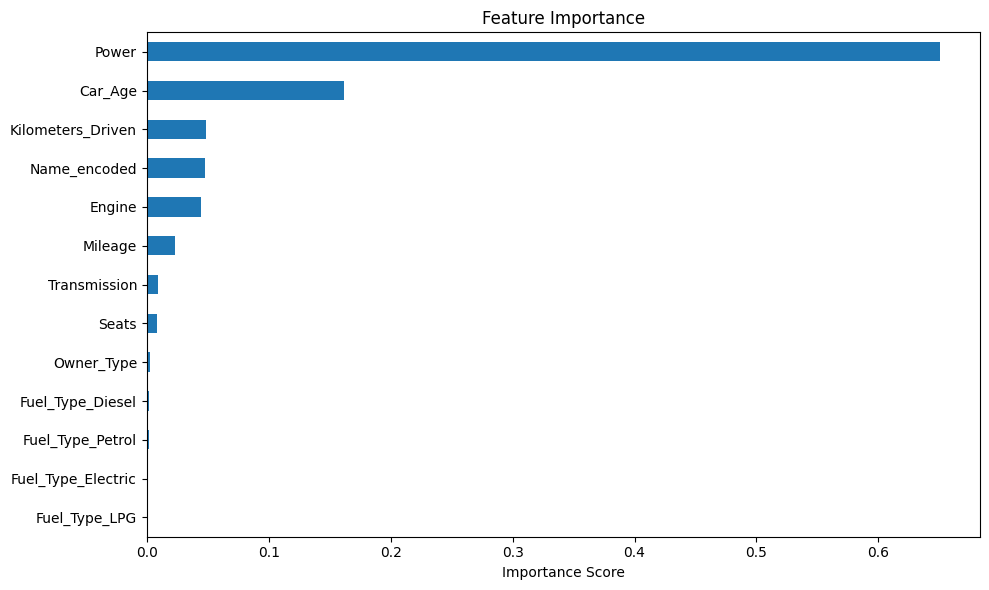

In [374]:
# Visualize feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6), title="Feature Importance")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [375]:
# Select features with importance > 0.01
selected_features = importances[importances > 0.01].index.tolist()
print("\n Selected Features for Modeling:\n", selected_features)


 Selected Features for Modeling:
 ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Car_Age', 'Name_encoded']


In [376]:
# Prepare final feature matrix
X_final = X[selected_features]
y_final = y

print("\nFinal Feature Matrix Shape:", X_final.shape)
print("Target Vector Shape:", y_final.shape)


Final Feature Matrix Shape: (6019, 6)
Target Vector Shape: (6019,)


NLP Feature Engineering

In [377]:
# Reconstruct Fuel_Type from one-hot columns
fuel_type_cols = [col for col in Car.columns if col.startswith("Fuel_Type_")]
Car['Fuel_Type_Reconstructed'] = Car[fuel_type_cols].idxmax(axis=1).str.replace("Fuel_Type_", "")

# Create a new 'Description' column using text features
Car['Description'] = (
    "The " + Car['Name'] + " is a " + Car['Year'].astype(str) +
    " model, runs on " + Car['Fuel_Type_Reconstructed'] + ", has " +
    Car['Transmission'].astype(str) + " transmission, owned as " + Car['Owner_Type'].astype(str) +
    ", with mileage " + Car['Mileage'].astype(str) + " kmpl, engine " +
    Car['Engine'].astype(str) + " CC and power " + Car['Power'].astype(str) + " BHP."
)


In [378]:
# View sample descriptions
print(Car[['Name', 'Description']].head())

                               Name  \
0            Maruti Wagon R LXI CNG   
1  Hyundai Creta 1.6 CRDi SX Option   
2                      Honda Jazz V   
3                 Maruti Ertiga VDI   
4   Audi A4 New 2.0 TDI Multitronic   

                                         Description  
0  The Maruti Wagon R LXI CNG is a 2010 model, ru...  
1  The Hyundai Creta 1.6 CRDi SX Option is a 2015...  
2  The Honda Jazz V is a 2011 model, runs on Petr...  
3  The Maruti Ertiga VDI is a 2012 model, runs on...  
4  The Audi A4 New 2.0 TDI Multitronic is a 2013 ...  


In [379]:
# Preprocess text (lowercase, remove punctuation)
Car['Description'] = Car['Description'].str.lower().str.replace(f"[{string.punctuation}]", "", regex=True)

In [380]:
# Convert text to numeric features using CountVectorizer
vectorizer = CountVectorizer(max_features=50)
X_text = vectorizer.fit_transform(Car['Description'])
X_text_df = pd.DataFrame(X_text.toarray(), columns=vectorizer.get_feature_names_out())

In [381]:
# Combine NLP features with selected structured features
X_combined = pd.concat([X_final.reset_index(drop=True), X_text_df.reset_index(drop=True)], axis=1)
y = y_final  # target variable

print("Shape of combined features with NLP:", X_combined.shape)

Shape of combined features with NLP: (6019, 56)


Word Cloud Visualization

In [382]:
# Combine all descriptions into one string
text = " ".join(Car['Description'].tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

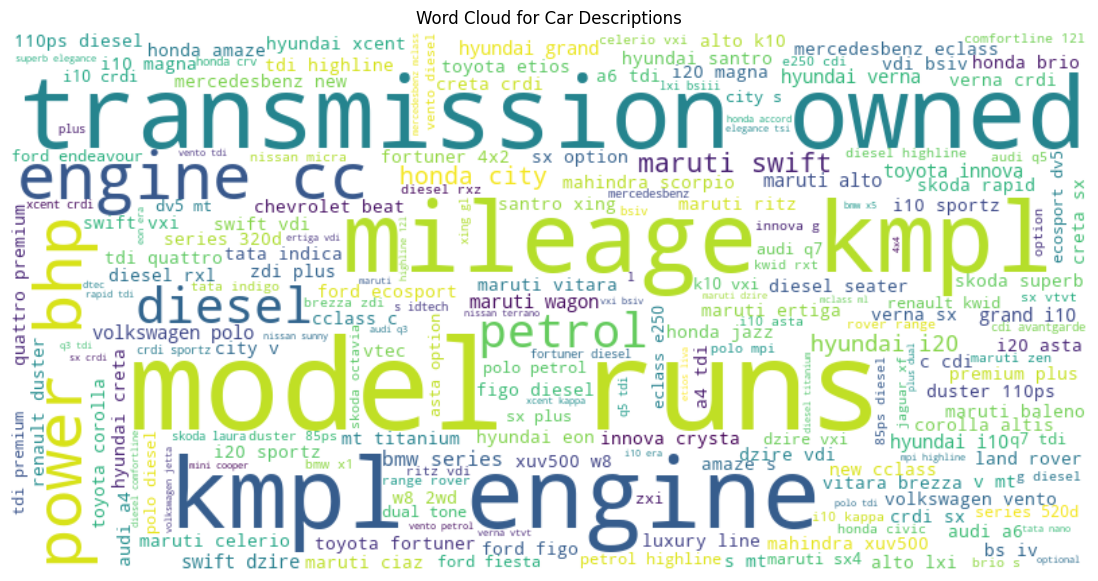

In [383]:
# Display the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Car Descriptions")
plt.show()

Model Development with Pipeline

In [384]:
# Define raw feature matrix and target
X = Car[numeric_features + categorical_features]
y = Car['Price_in_Rupees']

In [385]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (4815, 9)
Testing data shape: (1204, 9)


In [386]:
# Identify numeric columns in X_combined
numeric_in_combined = [col for col in X.columns if col in numeric_features]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [387]:
# Create pipeline with Random Forest
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))
])

In [388]:
# Train the pipeline
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Comparison

In [389]:
# Define multiple models for comparison
models = {
    "Linear Regression": Pipeline([('preprocessor', preprocessor), ('model', LinearRegression())]),
    "Lasso Regression": Pipeline([('preprocessor', preprocessor), ('model', Lasso(alpha=0.01))]),
    "Ridge Regression": Pipeline([('preprocessor', preprocessor), ('model', Ridge(alpha=1))]),
    "ElasticNet": Pipeline([('preprocessor', preprocessor), ('model', ElasticNet(alpha=0.01, l1_ratio=0.5))]),
    "Decision Tree": Pipeline([('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=42))]),
    "Random Forest": Pipeline([('preprocessor', preprocessor), ('model', RandomForestRegressor(n_estimators=100, random_state=42))]),
    "Gradient Boosting": Pipeline([('preprocessor', preprocessor), ('model', GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))]),
    "AdaBoost": Pipeline([('preprocessor', preprocessor), ('model', AdaBoostRegressor(n_estimators=100, random_state=42))]),
    "XGBoost": Pipeline([('preprocessor', preprocessor), ('model', XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42))]),
    "SVR": Pipeline([('preprocessor', preprocessor), ('model', SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))]),
    "KNN": Pipeline([('preprocessor', preprocessor), ('model', KNeighborsRegressor(n_neighbors=5))]),
    "MLP Regressor": Pipeline([('preprocessor', preprocessor), ('model', MLPRegressor(hidden_layer_sizes=(100,50), max_iter=1000, random_state=42))])
}

Cross-Validation and Evaluation

In [390]:
# Define evaluation function
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

In [391]:
# 5-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, rmse, r2 = evaluate_model(y_test, y_pred)

    results.append({
        "Model": name,
        "CV R2 Mean": cv_scores.mean(),
        "MAE": mae,
        "RMSE": rmse,
        "R2 Score": r2
    })

    print(f"\n{name} Evaluation:")
    print(f"CV Mean R2: {cv_scores.mean():.4f}")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2 Score: {r2:.4f}")


Linear Regression Evaluation:
CV Mean R2: 0.7958
MAE: 253709.53, RMSE: 536134.63, R2 Score: 0.7664

Lasso Regression Evaluation:
CV Mean R2: 0.8109
MAE: 244602.02, RMSE: 495939.53, R2 Score: 0.8001

Ridge Regression Evaluation:
CV Mean R2: 0.8129
MAE: 266460.69, RMSE: 545818.20, R2 Score: 0.7579

ElasticNet Evaluation:
CV Mean R2: 0.7277
MAE: 367237.83, RMSE: 687452.71, R2 Score: 0.6160

Decision Tree Evaluation:
CV Mean R2: 0.8462
MAE: 206270.76, RMSE: 461581.04, R2 Score: 0.8269

Random Forest Evaluation:
CV Mean R2: 0.8909
MAE: 169290.75, RMSE: 406002.40, R2 Score: 0.8661

Gradient Boosting Evaluation:
CV Mean R2: 0.8771
MAE: 202993.91, RMSE: 413855.57, R2 Score: 0.8608

AdaBoost Evaluation:
CV Mean R2: 0.5247
MAE: 622670.98, RMSE: 755701.61, R2 Score: 0.5359

XGBoost Evaluation:
CV Mean R2: 0.8700
MAE: 206343.13, RMSE: 426747.25, R2 Score: 0.8520

SVR Evaluation:
CV Mean R2: -0.0870
MAE: 580490.10, RMSE: 1149147.71, R2 Score: -0.0731

KNN Evaluation:
CV Mean R2: 0.8539
MAE: 204777

Hyperparameter Tuning (Random Forest)

In [392]:
# Grid Search for Random Forest
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7, None],
    'model__min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('model', RandomForestRegressor(random_state=42))]),
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

mae, rmse, r2 = evaluate_model(y_test, y_pred_rf)
print("\n--- Random Forest after Hyperparameter Tuning ---")
print("Best Params:", grid_rf.best_params_)
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.4f}")

results.append({
    "Model": "Random Forest (Tuned)",
    "CV R2 Mean": cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2').mean(),
    "MAE": mae,
    "RMSE": rmse,
    "R2 Score": r2
})

Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Random Forest after Hyperparameter Tuning ---
Best Params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
MAE: 169290.75, RMSE: 406002.40, R2: 0.8661


Hyperparameter Tuning (XGBoost)

In [393]:
# Define hyperparameter grid
param_grid_xgb = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1]
}

# Create pipeline with preprocessing and model
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Perform grid search
grid_xgb = GridSearchCV(
    pipeline_xgb,
    param_grid=param_grid_xgb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit model
grid_xgb.fit(X_train, y_train)

# Get best model and predictions
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [394]:
# Evaluate performance
mae_xgb, rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print("\n--- XGBoost after Hyperparameter Tuning ---")
print("Best Params:", grid_xgb.best_params_)
print(f"MAE: {mae_xgb:.2f}, RMSE: {rmse_xgb:.2f}, R2: {r2_xgb:.4f}")

# Append results for comparison
results.append({
    "Model": "XGBoost (Tuned)",
    "CV R2 Mean": cross_val_score(best_xgb, X_train, y_train, cv=5, scoring='r2').mean(),
    "MAE": mae_xgb,
    "RMSE": rmse_xgb,
    "R2 Score": r2_xgb
})


--- XGBoost after Hyperparameter Tuning ---
Best Params: {'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200}
MAE: 171056.23, RMSE: 398431.63, R2: 0.8710


Final Summary and Visualization

In [395]:
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False).reset_index(drop=True)

In [396]:
# Round values for readability
results_df["MAE"] = results_df["MAE"].round(0).astype(int)
results_df["RMSE"] = results_df["RMSE"].round(0).astype(int)
results_df["CV R2 Mean"] = results_df["CV R2 Mean"].round(4)
results_df["R2 Score"] = results_df["R2 Score"].round(4)

In [397]:
# Display final summary
print("\n Final Model Performance Summary ")
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))


 Final Model Performance Summary 
╒═══════════════════════╤══════════════╤════════╤═════════╤════════════╕
│ Model                 │   CV R2 Mean │    MAE │    RMSE │   R2 Score │
╞═══════════════════════╪══════════════╪════════╪═════════╪════════════╡
│ XGBoost (Tuned)       │       0.8873 │ 171056 │  398432 │     0.871  │
├───────────────────────┼──────────────┼────────┼─────────┼────────────┤
│ Random Forest         │       0.8909 │ 169291 │  406002 │     0.8661 │
├───────────────────────┼──────────────┼────────┼─────────┼────────────┤
│ Random Forest (Tuned) │       0.8883 │ 169291 │  406002 │     0.8661 │
├───────────────────────┼──────────────┼────────┼─────────┼────────────┤
│ Gradient Boosting     │       0.8771 │ 202994 │  413856 │     0.8608 │
├───────────────────────┼──────────────┼────────┼─────────┼────────────┤
│ MLP Regressor         │       0.8702 │ 186866 │  414506 │     0.8604 │
├───────────────────────┼──────────────┼────────┼─────────┼────────────┤
│ XGBoost       

In [398]:
# Identify best model
best_model_row = results_df.loc[results_df['R2 Score'].idxmax()]
print("Best Model Summary:\n", best_model_row)

Best Model Summary:
 Model         XGBoost (Tuned)
CV R2 Mean             0.8873
MAE                    171056
RMSE                   398432
R2 Score                0.871
Name: 0, dtype: object


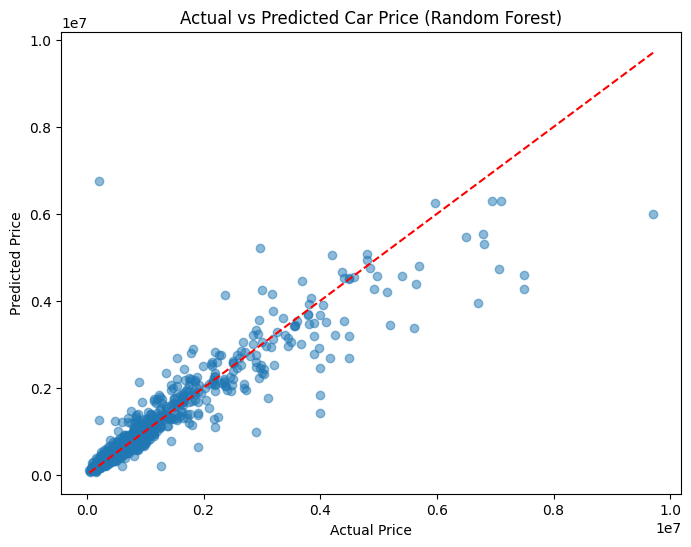

In [399]:
# Actual vs Predicted Plot – Random Forest
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price (Random Forest)")
plt.show()


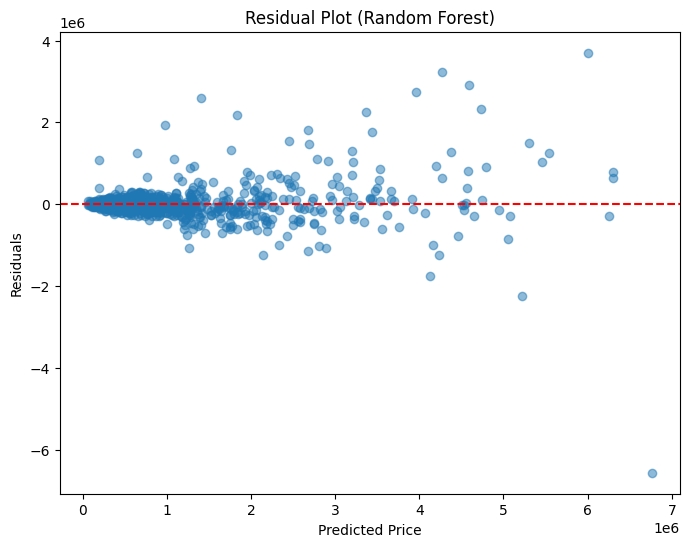

In [400]:
# Residual Plot – Random Forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(8,6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()


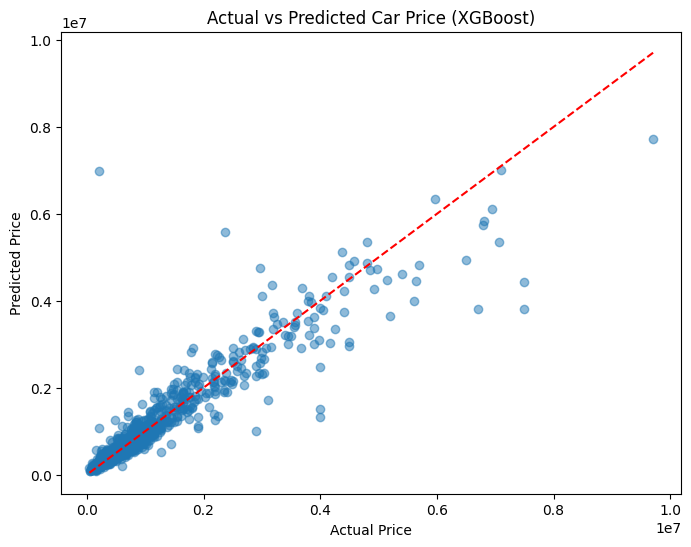

In [401]:
# Actual vs Predicted Plot – XGBoost
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price (XGBoost)")
plt.show()

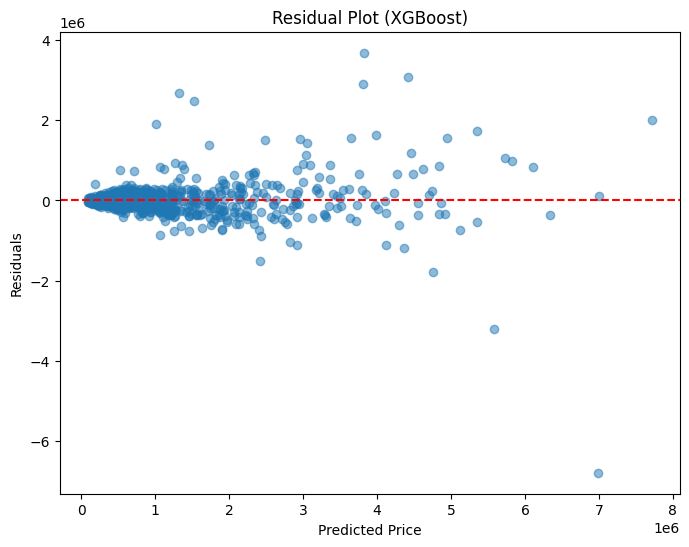

In [402]:
# Residual Plot – XGBoost
residuals_xgb = y_test - y_pred_xgb
plt.figure(figsize=(8,6))
plt.scatter(y_pred_xgb, residuals_xgb, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot (XGBoost)")
plt.show()

Saving the Model and Features

In [ ]:
import pickle

# Save the Best Model Based on R² Score
best_model_name = best_model_row["Model"]

# Match the model name to the correct trained object
if "XGBoost" in best_model_name:
    best_model = best_xgb
elif "Random Forest" in best_model_name:
    best_model = best_rf
else:
    # Fallback: search in models dictionary (pipelines or untuned models)
    best_model = models.get(best_model_name)

# Save the best model
with open("Best_Model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# Save the feature columns used in training
feature_columns = X_train.columns.tolist()
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(feature_columns, f)

# Save the name encoding map for consistent prediction
name_map = {name: idx for idx, name in enumerate(Car['Name'].astype('category').cat.categories)}
with open("name_map.pkl", "wb") as f:
    pickle.dump(name_map, f)

print("Best model, feature columns, and name map saved successfully!")

✅ Best model, feature columns, and name map saved successfully!
